In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

In [2]:
# Impartar funciones de utils
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/utils")
from utils import corr_plot

# Análisis Exploratorio de Datos (*EDA*)

El objetivo del presente documento es analizar la base de datos con la cual se estará trabajando.

### Lectura y preparación de datos

In [3]:
data = pd.read_csv('../data/data_t_final.csv')

Las dimensiones (cantidad de variables y observaciones) son

In [4]:
print('Cantidad de observaciones (renglones): ', data.shape[0])
print('Cantidad de variables: ', data.shape[1])

Cantidad de observaciones (renglones):  62178
Cantidad de variables:  28


Las variables con las que cuenta el `dataset` son las siguientes

In [5]:
for column in data.columns:
    print(column)

id
time
orig_time
first_time
mat_time
res_time
balance_time
LTV_time
interest_rate_time
rate_time
hpi_time
gdp_time
uer_time
REtype_CO_orig_time
REtype_PU_orig_time
REtype_SF_orig_time
investor_orig_time
balance_orig_time
FICO_orig_time
LTV_orig_time
Interest_Rate_orig_time
state_orig_time
hpi_orig_time
default_time
payoff_time
status_time
lgd_time
recovery_res


La proporción de valores faltantes por cada variables se muestra a continuación:

In [6]:
data.isna().mean()

id                         0.000000
time                       0.000000
orig_time                  0.000000
first_time                 0.000000
mat_time                   0.000000
res_time                   0.981344
balance_time               0.000000
LTV_time                   0.000402
interest_rate_time         0.000000
rate_time                  0.000000
hpi_time                   0.000000
gdp_time                   0.000000
uer_time                   0.000000
REtype_CO_orig_time        0.000000
REtype_PU_orig_time        0.000000
REtype_SF_orig_time        0.000000
investor_orig_time         0.000000
balance_orig_time          0.000000
FICO_orig_time             0.000000
LTV_orig_time              0.000000
Interest_Rate_orig_time    0.000000
state_orig_time            0.005629
hpi_orig_time              0.000000
default_time               0.000000
payoff_time                0.000000
status_time                0.000000
lgd_time                   0.975474
recovery_res               0

Las variables con mayor cantidad de valores faltantes son:
1. `res_time`.- periodo en el que se recuperó la vivienda.
1. `lgd_time`.- severidad al momento del default
1. `recovery_res`.- suma de los flujos recibidos durante el periodo de resolución
1. `LTV_time`.- *Loan to Value* en el momento de la orriginación

Para las primeras $3$ variables la cantidad de valores faltantes es demasiado alta, de manera que si se omitieran dichos valores faltantes, entonces la base de datos contaría aproximadamente con el $2\%$ de las observaciones originales, por lo que se omitirán dichas variables y posteriormente se omitirán los valores faltantes que corresponden aproximadamente al $0.5629\%$ 

In [7]:
selected_data = data.drop(['res_time', 'lgd_time', 'recovery_res'], axis=1).dropna()
selected_data.isna().mean()

id                         0.0
time                       0.0
orig_time                  0.0
first_time                 0.0
mat_time                   0.0
balance_time               0.0
LTV_time                   0.0
interest_rate_time         0.0
rate_time                  0.0
hpi_time                   0.0
gdp_time                   0.0
uer_time                   0.0
REtype_CO_orig_time        0.0
REtype_PU_orig_time        0.0
REtype_SF_orig_time        0.0
investor_orig_time         0.0
balance_orig_time          0.0
FICO_orig_time             0.0
LTV_orig_time              0.0
Interest_Rate_orig_time    0.0
state_orig_time            0.0
hpi_orig_time              0.0
default_time               0.0
payoff_time                0.0
status_time                0.0
dtype: float64

In [8]:
print('Cantidad de observaciones (renglones): ', selected_data.shape[0])
print('Cantidad de variables: ', selected_data.shape[1])

Cantidad de observaciones (renglones):  61803
Cantidad de variables:  25


In [9]:
print('Porcentaje de observaciones (renglones) pérdidas: ', selected_data.shape[0]/data.shape[0]*100, '%')
print('Porcentaje de variables pérdidas: ', selected_data.shape[1]/data.shape[1]*100, '%')

Porcentaje de observaciones (renglones) pérdidas:  99.39689279166265 %
Porcentaje de variables pérdidas:  89.28571428571429 %


### Exploración de datos - datos faltantes

El `dataset` con el que se trabajará en el presente documento tiene la siguiente estructura (visual)

In [10]:
selected_data.head(5)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,rate_time,hpi_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,4,25,-2,25,119,61031.10,33.911009,10.500,5.9,226.29,...,0,63750.0,587,81.8,10.5,KY,97.99,0,0,0
1,4,26,-2,25,119,60882.42,34.007232,10.500,5.9,225.10,...,0,63750.0,587,81.8,10.5,KY,97.99,0,0,0
2,4,27,-2,25,119,60729.80,34.335349,10.500,5.9,222.39,...,0,63750.0,587,81.8,10.5,KY,97.99,0,0,0
3,4,28,-2,25,119,60576.14,34.672545,10.875,5.9,219.67,...,0,63750.0,587,81.8,10.5,KY,97.99,0,0,0
4,4,29,-2,25,119,60424.39,34.951639,10.875,5.9,217.37,...,0,63750.0,587,81.8,10.5,KY,97.99,0,0,0


Cabe recordar al lector, que cada observación (renglón) del `dataset` representa préstamos realizados a una determinada fecha, la cual indica el número de trimestre, iniciando desde el primer semestre del año $2000$ y finalizando en el último trimestre del año $2015$.

In [11]:
print('Cantidad de acreditados únicos: ', len(selected_data.id.unique()))
print('Cantidad de trimestres: ', len(selected_data.time.unique()))

Cantidad de acreditados únicos:  4979
Cantidad de trimestres:  60


Se le realizaron préstamos a $4,979$ personas distintas a lo largo de $60$ trimestres que corresponden a los $15$ años del periodo de estudio.

### Exploración de datos - estructura de variables

El siguiente paso del análisis exploratorio es observar la dispersión de los datos para ello utilizaremos diagramas de cajas y brazos únicamente de las variables siguientes:

* `FICO_orig_time`
* `LTV_orig_time`
* `Interest_Rate_orig_time`
* `hpi_orig_time`

Debido a que son las variables que se obtienen al momento de generar el préstamo, además de que son no categóricas, por lo cual podemos analizar la dispersión de ellas.

In [12]:
variables = ['FICO_orig_time', 'LTV_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time']

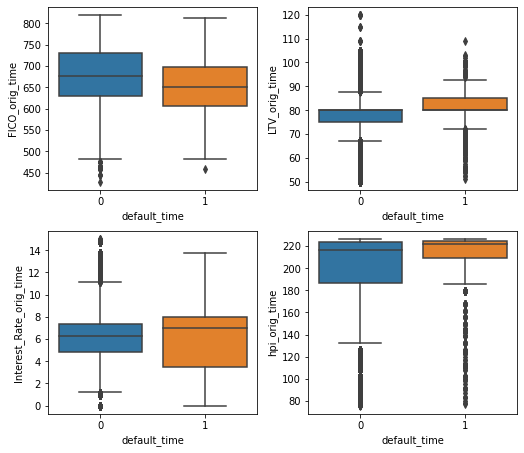

In [13]:
n = len(variables)
fig, ax = plt.subplots(2,2, figsize=(7.5,6.5))
#fig.set_size_inches(5.5, 20.5)
loc_i = [0,0,1,1]
loc_j = [0,1,0,1]
fig.tight_layout(pad=2)

for i in range(n):
    sns.boxplot(x='default_time', y = variables[i], data = selected_data, ax = ax[loc_i[i]][loc_j[i]])    

Notemos que para las variables `Interest_Rate_orig_time` y `LTV_orig_time` la media es superior para el grupo identificado como *default* que para el *no default*. Mientras que para la variable `FICO_orig_time` ocurre lo contrario. Además, la dispersión para el grupo *default* de la variable `Interest_Rate_orig_time` es mayor y para la variable `hpi_orig_time` es mayor para el grupo *no default*.

Para las variables dicotómicas a continuación se calculará la desviación estándar y la media, dichas variables son las siguientes:
* `REtype_CO_orig_time`
* `REtype_PU_orig_time`
* `REtype_SF_orig_time`
* `investor_orig_time`


In [14]:
var_dic = ['REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time', 'investor_orig_time', 
           'default_time']

In [15]:
selected_data[var_dic].groupby(['default_time']).mean()

,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time
default_time,,,,
0,0.061277,0.128094,0.607176,0.14639
1,0.051350,0.132324,0.633311,0.14154


Notemos que la proporción para las variables dicotómias es muy parecida a excepción de la variable `REtype_SF_orig_time`, que indica la proporción de préstamos realizados a individuos con vivienda unitaria. Nótese que esta proporción es mayor para la categoría *default*.

In [16]:
selected_data[var_dic].groupby(['default_time']).std()

,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time
default_time,,,,
0,0.239839,0.334197,0.488382,0.353500
1,0.220782,0.338954,0.482059,0.348693


La desviación estándar es muy similar para todas las variables dicotómicas.

In [17]:
variables.append('default_time')

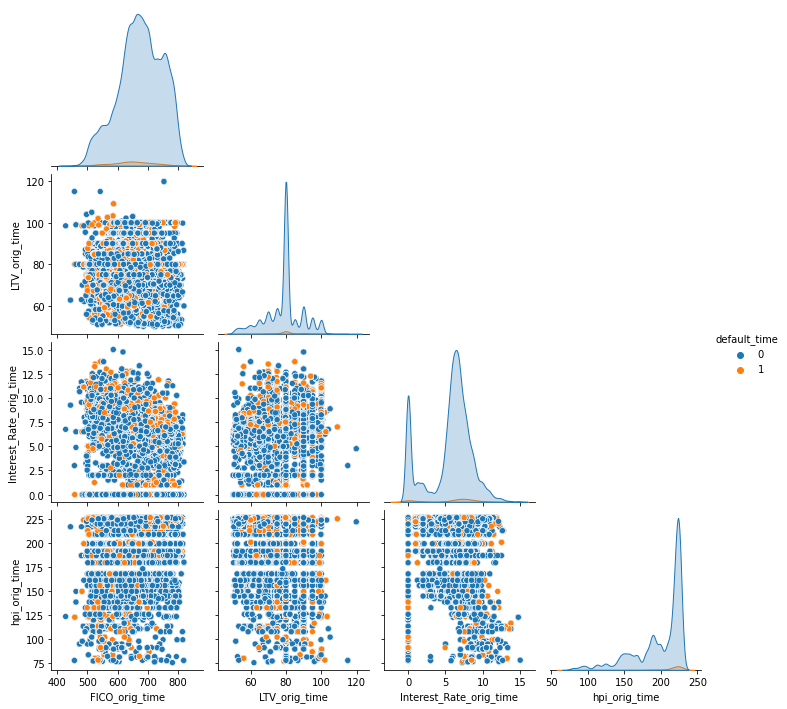

In [18]:
sns.pairplot(selected_data[variables], hue="default_time", corner = True)

El previo gráfico mostrando la relación entre variables muestra que al parecer no existe una relación lineal entre las variables, lo cual es deseable, pues se utiliza un modelo lineal, ya que la regresión logística pertenece a la clase de modelos lineales generalizados.

In [19]:
variables.remove('default_time')

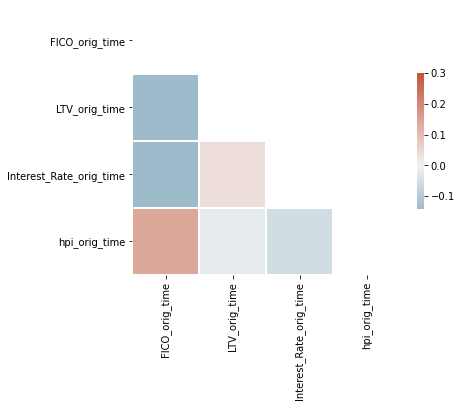

In [20]:
corr_plot(selected_data, variables)

El previo mapa de calor, nos muestra un hecho que se podía deducir (sin facilidad), el cual es que la correlación entre las variables originadas al momento del préstamo es nula, lo cual nos abre paso a seguir utilizando todas estas variables para el uso del modelo de regresión logística.